Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

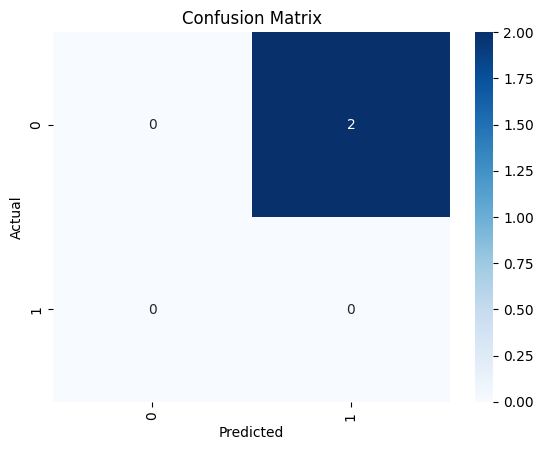

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
data = {
    'review': [
        "I love this product, it works great!",
        "Terrible experience, will never buy again.",
        "Absolutely fantastic! Highly recommend it.",
        "Worst purchase ever, totally disappointed.",
        "Not bad, but could be better.",
        "Amazing quality and fast delivery!",
        "Horrible service and rude staff.",
        "Great value for money.",
        "The item broke after one use.",
        "Super happy with the product!"
    ],
    'sentiment': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]  # 1 = Positive, 0 = Negative
}

df = pd.DataFrame(data)
df.head()
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
# Split data
X = df['review']
y = df['sentiment']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)
X_tfidf = tfidf.fit_transform(X)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
